# 1) Implementar el algoritmo de k-medias desde cero

In [ ]:
#Importando las bibliotecas pertinentes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs


#Primero definimos nuestra función de distancia Euclidiana (Euclideana(?)) para R^n
def Euc(p1,p2):
    """ Función que calcula la distancia euclideana de dos puntos
    Args:
      p1(np array): uno de los puntos de los cuales se quiere calcular la distancia
      p2(np array): el otro punto que se ocupa para el cálculo
    Returns:
      dist(float): regresa la dsitancia calculada 
    """
    #Por cada coordenada calcularemos la diferencia al cuadrado
    for i in range(0,len(p1)-1):
      dist=((p1[i]-p2[i])**2+(p1[i+1]-p2[i+1])**2)
    #Sacamos la raiz cuadrada del valor obtenido
    dist=np.sqrt(dist)
    return(dist)
#Función de distancia Mnahattan
def ManDist(p1, p2):
    """ Función que calcula la distancia con la metrica L1 de dos puntos
    Args:
      p1(np array): uno de los puntos de los cuales se quiere calcular la distancia
      p2(np array): el otro punto que se ocupa para el cálculo
    Returns:
      dist(float): regresa la dsitancia calculada
    """ 
    for i in range(0, len(p1)-1):
        dist=abs(p1[i]-p2[i])+abs(p1[i+1]-p2[i+1])
    return(dist)

#Función que calcula el WCSS para utilizarlo posteriormente en el método del codito
def Calc_W(X, cent, cl, functDist):
  """ Función que calcula el WCSS
  Args:
    X(np array): La matriz con los features que queremos calcular
    cent(np array): El arreglo de centroides
    cl(np array): El arreglo con las coordenadas de los clusters
    functDist(function ): La función distancia que se usará en el cálculo
  Returns:
    suma(float): regresa el valor del WCSS calculado
  """ 
  suma=0
  for i, v in enumerate(X):
    suma+=functDist(cent[int(cl[i]),:], v)
  return suma

#Función para el algoritmo de las K-medias
def Kmeans(X,k, functDist, df):
  """ Función para calcular los centroides y los clusters utilizando el método de K-medias
  Args:
    X(np array): El arreglo de features del cual se quiere sacar los clusters y los centroides
    k(int): El número de clusters que se desea calcular
    functDist(function): La función distancia usada para calcular las k-medias
  """
  #Damos una condición de salida para finalizar nuestro algoritmo, inicializamos todos los valores de los clusters en 0
  #Inicializamos nuestros centroides
  dif=1
  cl=np.zeros(X.shape[0])
  cent=df.sample(n=k).values
  while(dif):
    #Se aplica el algoritmo de las K-medias para calcular la distancia óptima y en caso de serlo la condición de salida se activa
    for i, renglon in enumerate(X):
      max_dist=float('inf')
      for id, c in enumerate(cent):
        distance=functDist(c,renglon)
        if max_dist>distance:
          max_dist=distance
          cl[i]=id
    n_cent=pd.DataFrame(X).groupby(by=cl).mean().values
    if np.count_nonzero(cent-n_cent)==0:
      dif=0
    else:
      cent=n_cent
  return cent, cl

#2) Modifica los ejemplos realizados en clase utilizando la distancia Manhattan y compara los resultados

## Ejemplo 1 visto en clase

In [ ]:
#Enchulamos las gráficas
plt.rcParams['figure.figsize'] = (12 , 6)
plt.style.use('ggplot')
#Cargamos nuestros datos a un data frame
data = pd.read_csv('https://bit.ly/2mi1lqG')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


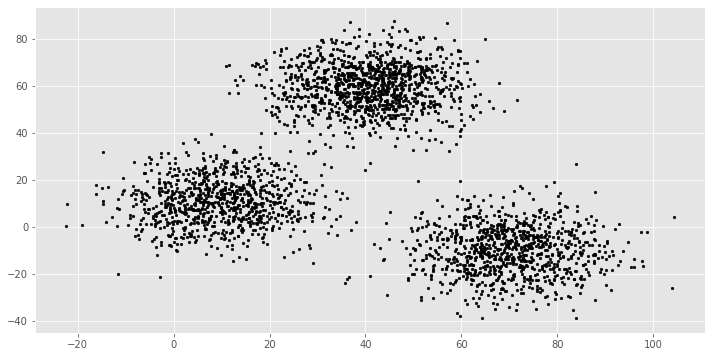

In [ ]:
#Separamos nuestros datos en las dos features que nos interesan y lo juntamos en un arreglo numérico
f1 = data ['V1'].values
f2 = data ['V2'].values
X = np.array (list( zip (f1,f2)))
#Graficamos nuestros datos, notamos que parece ser que hay 3 clusters
plt.scatter (f1,f2,c='black',s =7)

<function matplotlib.pyplot.show>

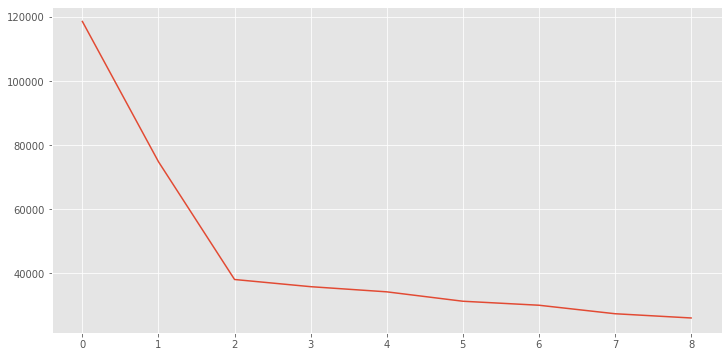

In [ ]:
#Encontramos los K valores utilizando el metodo del codo
clist=[]
for k in range(1,10):
  cent,cl= Kmeans(X,k, Euc,data)
  cost=Calc_W(X, cent, cl, Euc)
  clist.append(cost)

#Podemos ver que el codo parece doblarse en el punto 2, entonces tenemos 3 clusters
plt.plot(clist)
plt.show

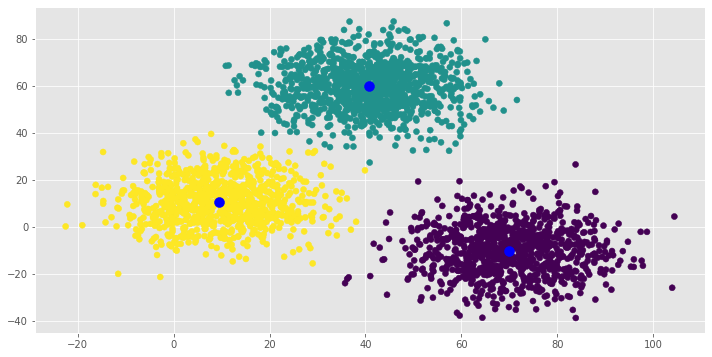

In [ ]:
#Creamos los clusters y encontramos los centroides usando nuestro algoritmo de K-medias
k=3
centroides, clusters=Kmeans(X,k, Euc, data)
plt.scatter(np.array(list(X[:,0])), np.array(list(X[:,1])), c=clusters)
plt.scatter(np.array(list(centroides[:,0])), np.array(list(centroides[:,1])), s=100, color="blue")
#Podemos ver que nuestro algoritmo funciona y nos separa de manera razonable los clusters

## Ejemplo 1 con distancia Manhattan

[150909.34458577936, 96173.1590465362, 48586.58087641815, 44946.0980572744, 42038.35969399721, 41123.89697316377, 36221.81701957947, 35781.361064740384, 36524.4200854521]


<function matplotlib.pyplot.show>

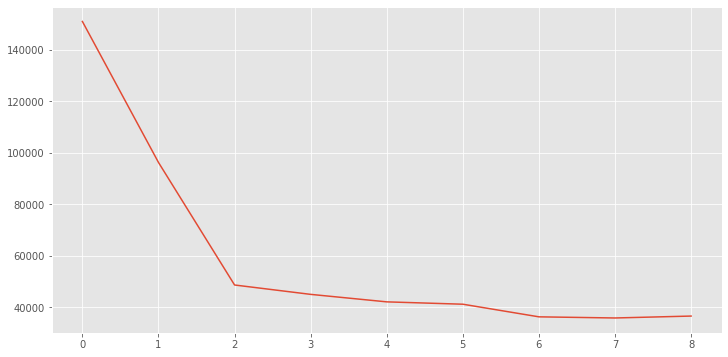

In [ ]:
clist=[]
for k in range(1,10):
  #Hacemos ahora lo mismo pero con la distancia L1
  cent,cl= Kmeans(X,k, ManDist, data)
  cost=Calc_W(X, cent, cl, ManDist)
  clist.append(cost)

#Notamos que a pesar de todo el cálculo de los WCSS es adecuado, por lo tanto tenemos 3 clusters
plt.plot(clist)
plt.show

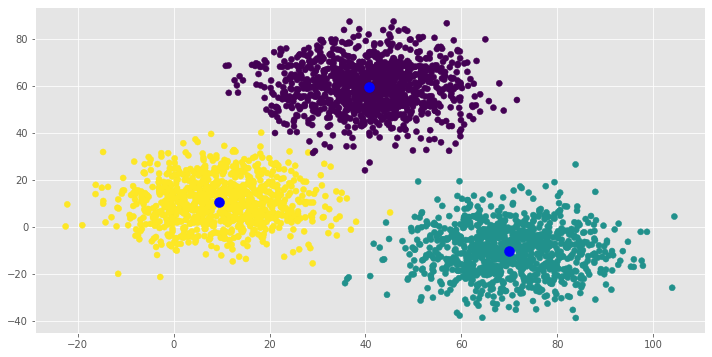

In [ ]:
#Creamos los clusters
k=3
#Utilizamos la distancia L1
centroides, clusters=Kmeans(X,k, ManDist, data)
plt.scatter(np.array(list(X[:,0])), np.array(list(X[:,1])), c=clusters)
plt.scatter(np.array(list(centroides[:,0])), np.array(list(centroides[:,1])), s=100, color="blue")

## Ejemplo 2 visto en clase

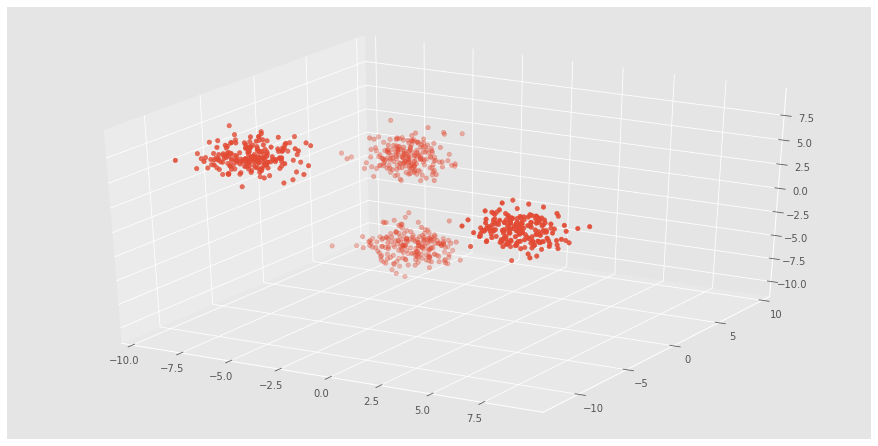

In [ ]:
#Ahora para un data set distinto de 3 dimensiones
#Primero generamos nuestro data set aleatorio con 4 centros, y 3 features 
X,y= make_blobs(n_samples=800, n_features=3, centers=4)
fig=plt.figure()
ax= Axes3D(fig)
ax.scatter(X[:,0], X[:,1],X[:,2])


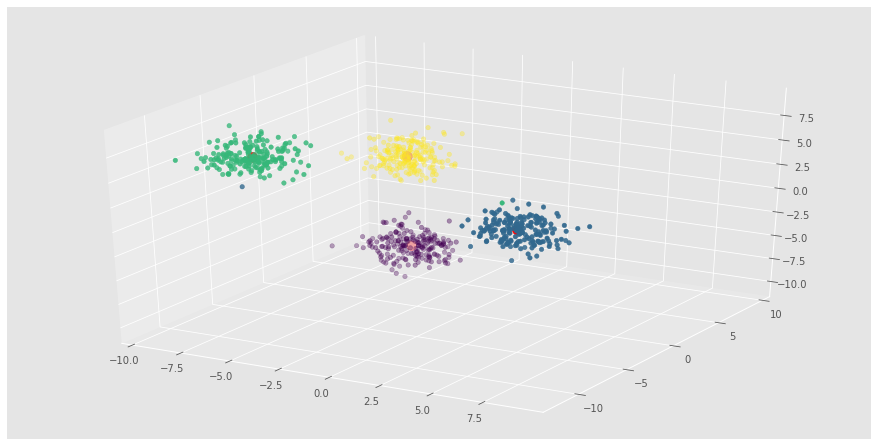

In [ ]:
#Como sabemos que van a haber 4 clusters, entonces no es necesario analizar utilizando el método del codo
k=4
centroides, clusters=Kmeans(X,k, Euc, pd.DataFrame(X))
fig=plt.figure()
ax= Axes3D(fig)
ax.scatter(X[:,0], X[:,1],X[:,2], c=clusters)
ax.scatter(np.array(list(centroides[:,0])), np.array(list(centroides[:,1])),np.array(list(centroides[:,2])), s=100, color="red")

#Aunque nuestro algoritmo funciona razonablemente bien, hay ciertos puntos que no se encuentran para nada cerca de los clusters, más aún si se repite la simulación podemos tener resultados distintos
#Los cuales distan de una aproximación correcta


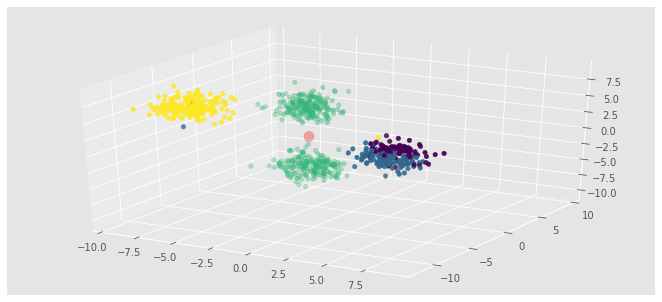

In [ ]:
#Ejemplo de una clusterización no adecuada
plt.rcParams['figure.figsize'] = (9 , 4)
plt.style.use('ggplot')
k=4
centroides, clusters=Kmeans(X,k, Euc, pd.DataFrame(X))
fig=plt.figure()
ax= Axes3D(fig)
ax.scatter(X[:,0], X[:,1],X[:,2], c=clusters)
ax.scatter(np.array(list(centroides[:,0])), np.array(list(centroides[:,1])),np.array(list(centroides[:,2])), s=100, color="red")

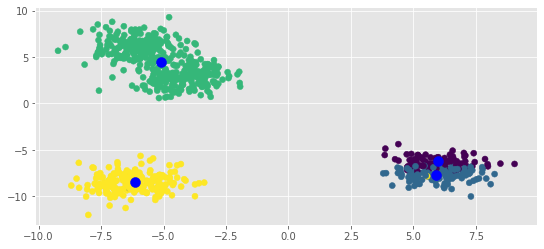

In [ ]:
#Sin embargo al proyectar sobre el plano XY podemos notar que la clusterización es un poco más acertada
plt.scatter(np.array(list(X[:,0])), np.array(list(X[:,1])), c=clusters)
plt.scatter(np.array(list(centroides[:,0])), np.array(list(centroides[:,1])), s=100, color="blue")

## Ejemplo 2 con distancia Manhattan

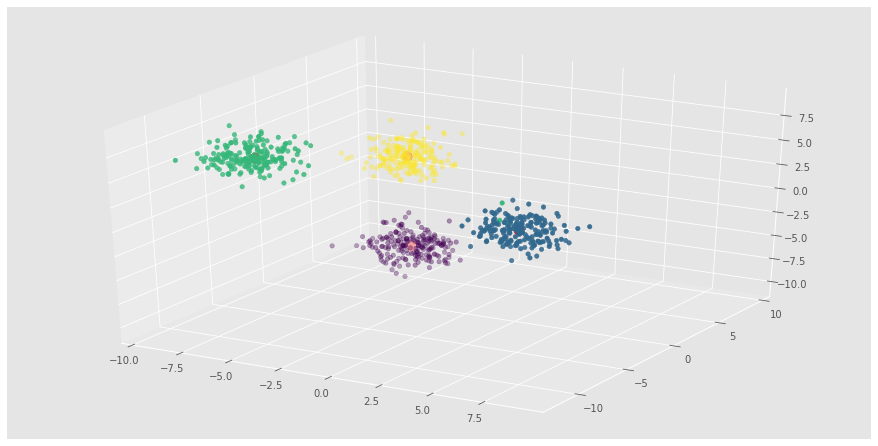

In [ ]:
#Utilizando el mismo método pero ahora usando la métrica L1 llegamos a resultados similares
k=4
centroides, clusters=Kmeans(X,k, ManDist, pd.DataFrame(X))
fig=plt.figure()
ax= Axes3D(fig)
ax.scatter(X[:,0], X[:,1],X[:,2], c=clusters)
ax.scatter(np.array(list(centroides[:,0])), np.array(list(centroides[:,1])),np.array(list(centroides[:,2])), s=100, color="red")
#Sin embargo seguimos sujetos al problema anterior, hay ejecuciones del código que no resultan en una clusterización adecuada